In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as go
import os

# Question 1 


- nombre d'observations = 499
- période = 1983 to 2025
- 7 parametres non conserver

In [43]:
df_ch4 = pd.read_csv('ch4_mm_gl.csv',header=45)
display(df_ch4)
print(df_ch4.columns)

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.96,2.19,1635.15,1.42
1,1983,8,1983.625,1628.05,2.72,1635.64,1.36
2,1983,9,1983.708,1638.42,2.16,1636.19,1.29
3,1983,10,1983.792,1644.81,1.40,1636.81,1.21
4,1983,11,1983.875,1642.60,0.71,1637.49,1.12
...,...,...,...,...,...,...,...
494,2024,9,2024.708,1935.67,-9.99,1931.99,-9.99
495,2024,10,2024.792,1941.58,-9.99,1932.75,-9.99
496,2024,11,2024.875,1940.44,-9.99,1933.49,-9.99
497,2024,12,2024.958,1937.52,-9.99,1934.23,-9.99


Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')


# Question 2

In [44]:
df_ch4 = df_ch4[['month', 'average']]
display(df_ch4)



,month,average
0,7,1625.96
1,8,1628.05
2,9,1638.42
3,10,1644.81
4,11,1642.60
...,...,...
494,9,1935.67
495,10,1941.58
496,11,1940.44
497,12,1937.52


# Question 3

# Question 4

V1 :

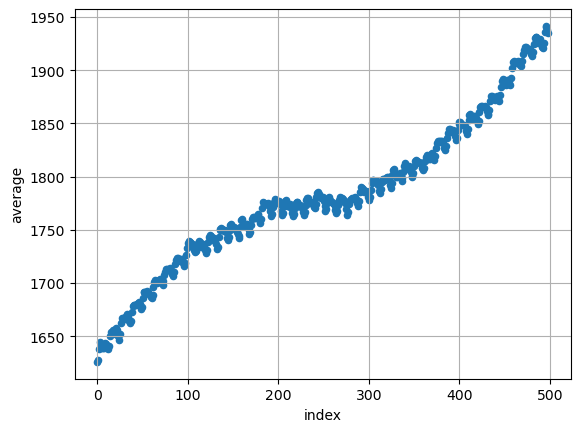

In [45]:

df_ch4.reset_index().plot.scatter(x='index',y='average')
plt.grid(True)

V2 :

In [46]:
def scatterplot_graphique(dataframe,message):
    f = sns.scatterplot(data=dataframe.reset_index(), x="index", y="average", hue="month",legend="full")
    plt.grid(True)
    plt.title(message)

je prefère la version 2...

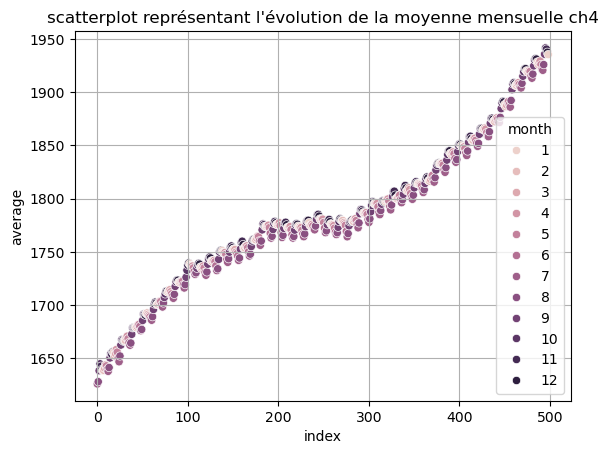

In [47]:
scatterplot_graphique(df_ch4,"scatterplot représentant l'évolution de la moyenne mensuelle ch4")

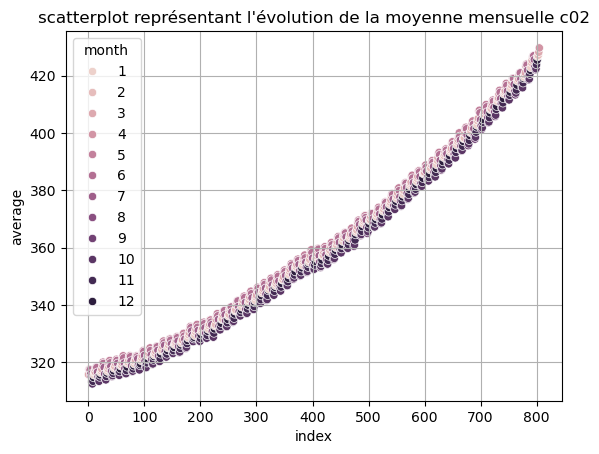

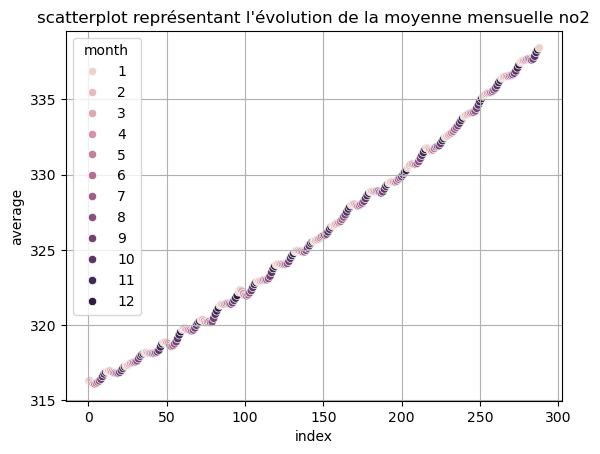

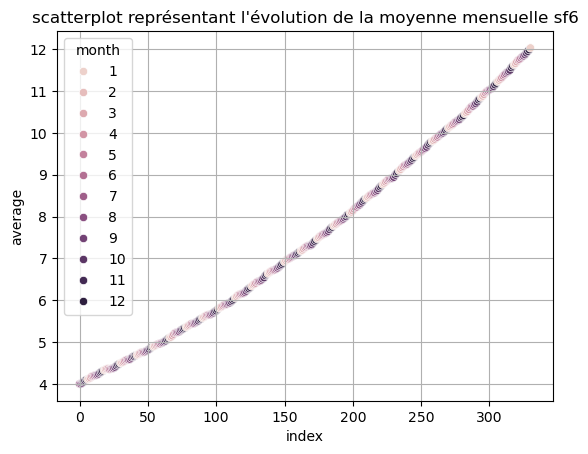

In [48]:
df_co2 = pd.read_csv('co2_mm_mlo.csv',header=40)
df_co2 = df_co2[['month', 'average']]
plt.figure()
scatterplot_graphique(df_co2,"scatterplot représentant l'évolution de la moyenne mensuelle c02")

df_n2o = pd.read_csv('n2o_mm_gl.csv',header=45)
df_n2o = df_n2o[['month', 'average']]
plt.figure()
scatterplot_graphique(df_n2o,"scatterplot représentant l'évolution de la moyenne mensuelle no2")

df_sf6 = pd.read_csv('sf6_mm_gl.csv',header=45)
df_sf6 = df_sf6[['month', 'average']]
plt.figure()
scatterplot_graphique(df_sf6,"scatterplot représentant l'évolution de la moyenne mensuelle sf6")



ch4 et no2 semble avoir des variations saisoniere du a l'epaisseur de la courbe.

# Question 5

### FONCTIONS

In [49]:
def moyenne_mobile_ordre_6(dataframe):
    window_size = 6
    smoothed_values = []
    smoothed_months = []

    for t in range(window_size, len(dataframe) - window_size):
        window = dataframe['average'].iloc[t - window_size : t + window_size + 1].values

        weighted_sum = 0.5 * window[0] + sum(window[1:-1]) + 0.5 * window[-1]
        smoothed_value = weighted_sum / 12

        smoothed_months.append(dataframe['month'].iloc[t])
        smoothed_values.append(smoothed_value)

    df_smoothed = pd.DataFrame({'month': smoothed_months, 'average_smoothed' : smoothed_values})
    return df_smoothed


In [50]:
def affichage_moyenne_mobile_ordre_6(dataframe,smoothed_dataframe,y_label): 
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=smoothed_dataframe.reset_index(), x="index", y="average_smoothed", label="Moyenne Mobile (ordre 6)")
    plt.grid(True)
    plt.title("Lissage par moyenne mobile centrée (ordre 6)")
    plt.xlabel("index")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.show()

In [51]:
def serie_residuelle_vector(dataframe,smoothed_dataframe,offset):
    x_t = dataframe['average'].iloc[offset : -offset].to_numpy()
    x_t_smoothed = smoothed_dataframe['average_smoothed'].to_numpy()
    S_t = x_t - x_t_smoothed
    months = dataframe['month'].iloc[offset : -offset].to_numpy()
    df_residuelle = pd.DataFrame({'month' : months, 'residual' : S_t})
    return df_residuelle



In [52]:
def affichage_serie_residuelle(dataframe_residuelle,y_label):
    sns.lineplot(data=dataframe_residuelle.reset_index(),x="index",y="residual",label="residuelle")
    plt.grid(True)
    plt.title("Serie residuelle")
    plt.xlabel("index")
    plt.ylabel(y_label + " residuelle")
    plt.legend()
    plt.show()



In [53]:
def coefficients_mensuels(dataframe, dataframe_residuelle, offset):
    months = dataframe['month'].iloc[offset : -offset].to_numpy()  
    dataframe_residuelle['month'] = months
    coefficients = dataframe_residuelle.groupby('month')['residual'].mean().sort_index()
    return coefficients



In [54]:
def affichage_coefficients_mensuels(serie_coefficient,y_label):
    dataframe_coefficient = serie_coefficient.reset_index()
    dataframe_coefficient.columns = ['month','coefficient']
    dataframe_coefficient['month'] = pd.to_numeric(dataframe_coefficient['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()


In [55]:
def centrer_coefficient_mensuels(serie_coefficients_mensuels):
    moyenne = serie_coefficients_mensuels.mean()
    coefficients_centrer = serie_coefficients_mensuels - moyenne
    return coefficients_centrer


In [56]:
def affichage_centrer_coefficient_mensuels(serie_coefficients_mensuels,y_label):
    dataframe_coefficient_mensuels = serie_coefficients_mensuels.reset_index()
    dataframe_coefficient_mensuels.columns = ['month','coefficient']
    dataframe_coefficient_mensuels['month'] = pd.to_numeric(dataframe_coefficient_mensuels['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient_mensuels,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels centrer")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels centrer")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()

In [57]:
def correction_variation_saisoniere(dataframe, serie_coefficient_mensuel):
    dataframe_copy = dataframe.copy()
    dataframe_copy['coefficient'] = dataframe_copy['month'].map(serie_coefficient_mensuel)
    dataframe_copy['corrigee'] = dataframe_copy['average'] - dataframe_copy['coefficient']
    return dataframe_copy

In [58]:
def afficher_correction_variation_saisoniere(dataframe, y_label):
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=dataframe.reset_index(), x="index", y="corrigee", label="Corrigee")
    plt.grid(True)
    plt.title("Correction des variations saisonnières")
    plt.xlabel("Index temporel")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [67]:
def regression_corrige_moindres_carres(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    x = dataframe.index.to_numpy()
    y = dataframe["corrigee"].to_numpy()
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    covariance_xy = np.sum((x - x_mean) * (y - y_mean))
    variance_x = np.sum((x - x_mean) ** 2)
    a = covariance_xy / variance_x
    b = y_mean - a * x_mean
    y_pred = a * x + b
    return x,y,y_pred,a,b


In [60]:
def affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,y_label):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, label="Série corrigee", color="blue", s=30)
    plt.plot(x, y_pred, label=f"Tendance : y = {a:.2f}x + {b:.2f}", color="red")

    plt.title("Tendance linéaire de la série corrigee des variations saisonnieres")
    plt.xlabel("Index")
    plt.ylabel(f"{y_label} corrige")
    plt.grid(True)
    plt.legend()
    plt.show()

In [70]:
def prevision(a, b, coeficient_mensuels, dataframe, nb_mois):
    previsions = []
    x_last = len(dataframe) - 1
    for i in range(1, nb_mois + 1):
        mois_futur = (x_last + i) % 12 or 12
        t = x_last + i
        tendance = a * t + b
        saison = coeficient_mensuels[mois_futur]
        prevision = tendance + saison
        previsions.append((t, mois_futur, prevision))
    return previsions


In [66]:
def affichage_prevision(previsions):
    df_prev = pd.DataFrame(previsions, columns=["Index", "Mois", "Prévision"])
    plt.figure(figsize=(12, 6))
    plt.plot(df_prev["Index"], df_prev["Prévision"], marker='o', label="Prévision")
    plt.title("Prévision mensuelle (tendance + saison)")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()

### CH4

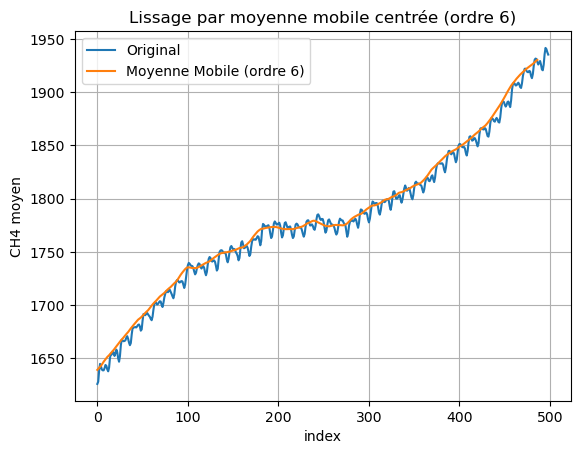

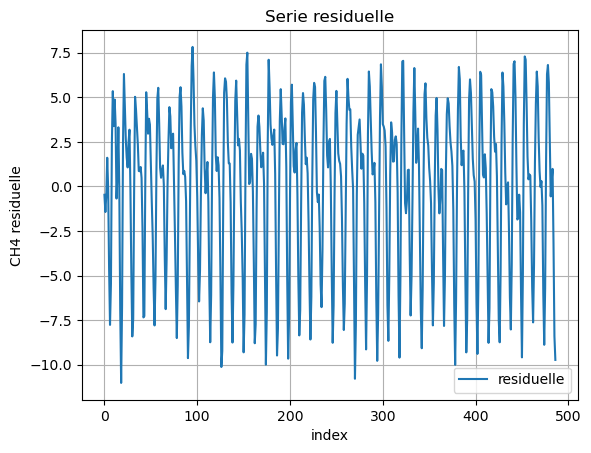

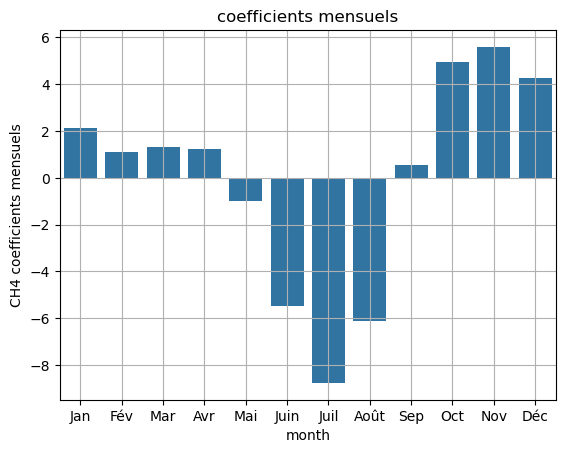

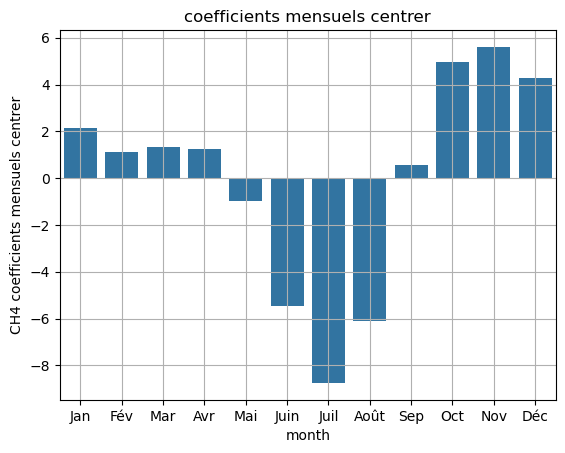

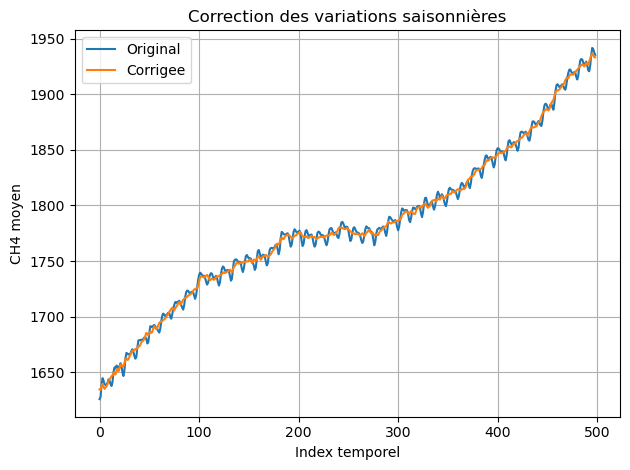

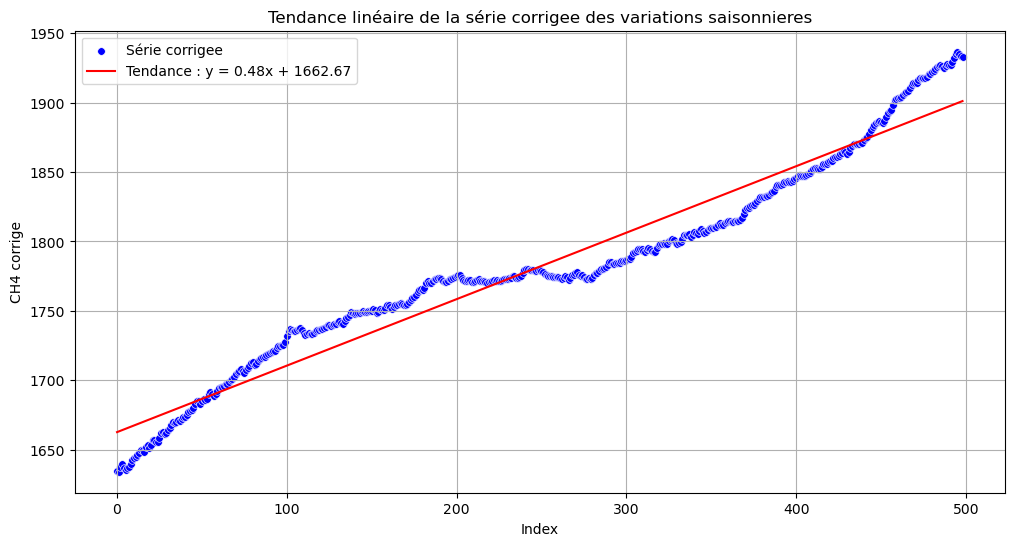

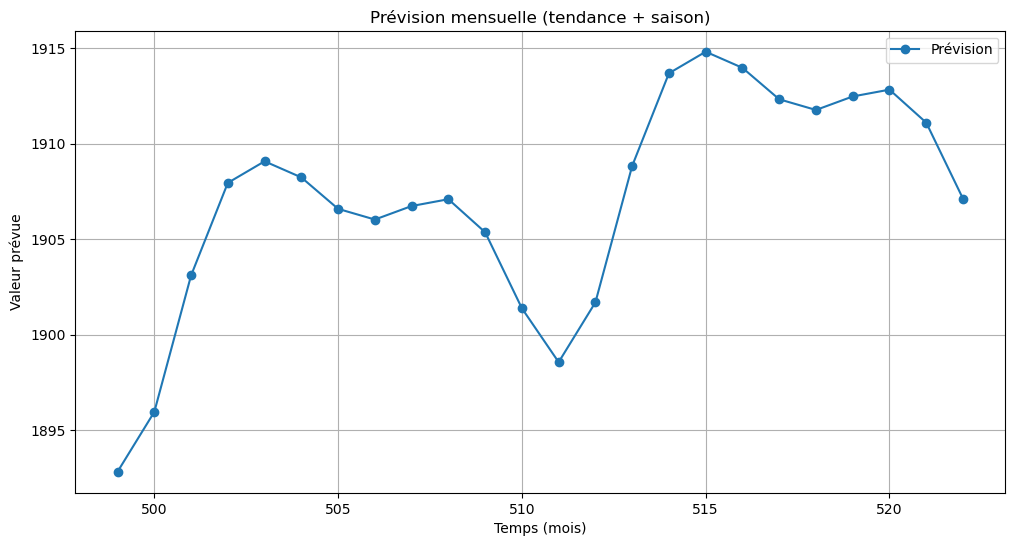

In [71]:
df_smoothed_ch4 = moyenne_mobile_ordre_6(df_ch4)
affichage_moyenne_mobile_ordre_6(df_ch4,df_smoothed_ch4,"CH4")

df_residual_ch4 = serie_residuelle_vector(df_ch4,df_smoothed_ch4,6)
affichage_serie_residuelle(df_residual_ch4,"CH4")

coefficients_mensuels_ch4 = coefficients_mensuels(df_ch4, df_residual_ch4, 6)
affichage_coefficients_mensuels(coefficients_mensuels_ch4,"CH4")

centrer_coefficient_mensuels_ch4 = centrer_coefficient_mensuels(coefficients_mensuels_ch4)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_ch4,"CH4")

correction_ch4 = correction_variation_saisoniere(df_ch4,centrer_coefficient_mensuels_ch4)
afficher_correction_variation_saisoniere(correction_ch4,"CH4")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_ch4)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"CH4")

prevision = prevision(a,b,centrer_coefficient_mensuels_ch4,df_ch4,24)
affichage_prevision(prevision)




### SF6

,month,average_smoothed
0,1,4.109583
1,2,4.127500
2,3,4.145833
3,4,4.164167
4,5,4.182083
...,...,...
314,3,11.689167
315,4,11.722917
316,5,11.756250
317,6,11.788750


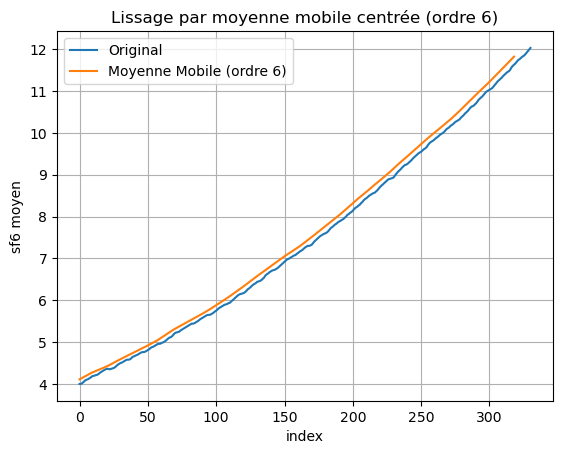

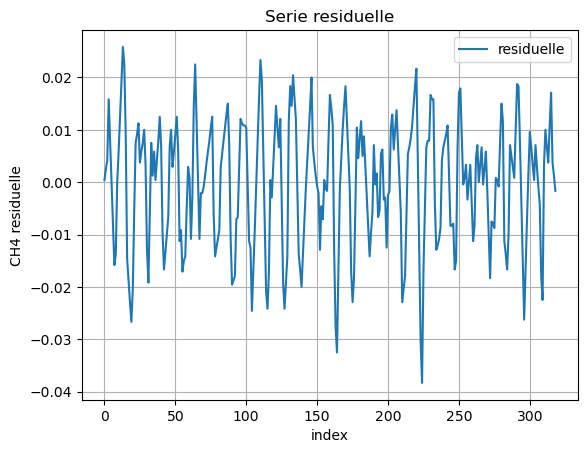

In [63]:
df_smoothed_sf6 = moyenne_mobile_ordre_6(df_sf6)
display(df_smoothed_sf6)
affichage_moyenne_mobile_ordre_6(df_sf6,df_smoothed_sf6,"sf6")
df_residual_sf6 = serie_residuelle_vector(df_sf6,df_smoothed_sf6,6)
affichage_serie_residuelle(df_residual_sf6,"CH4")

### N2O

,month,average_smoothed
0,7,316.389583
1,8,316.443333
2,9,316.502083
3,10,316.565833
4,11,316.629583
...,...,...
272,3,337.443333
273,4,337.523333
274,5,337.607083
275,6,337.691667


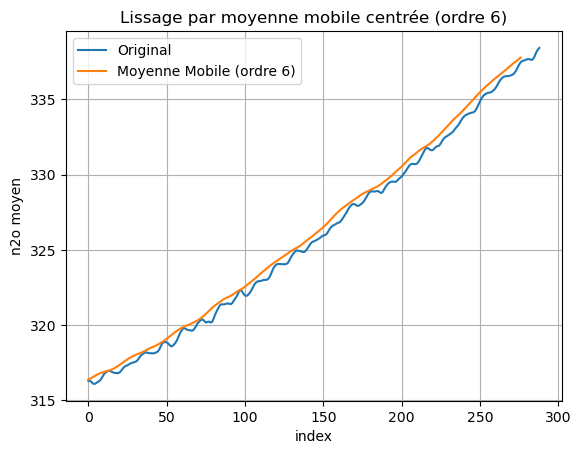

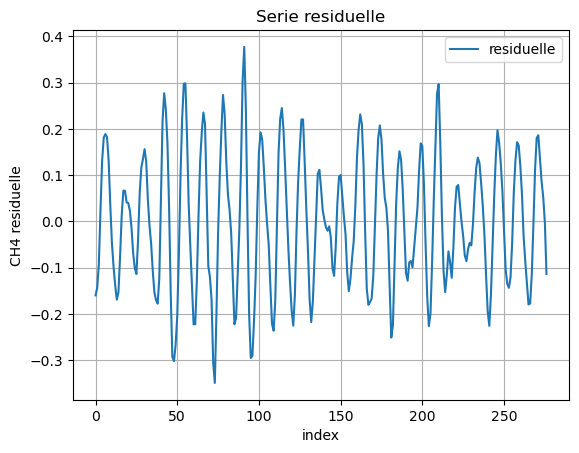

In [64]:
df_smoothed_n2o = moyenne_mobile_ordre_6(df_n2o)
display(df_smoothed_n2o)
affichage_moyenne_mobile_ordre_6(df_n2o,df_smoothed_n2o,"n2o")
df_residual_no2 = serie_residuelle_vector(df_n2o,df_smoothed_n2o,6)
affichage_serie_residuelle(df_residual_no2,"CH4")

### CO2

,month,average_smoothed
0,9,315.409167
1,10,315.459583
2,11,315.503333
3,12,315.572500
4,1,315.637083
...,...,...
789,6,424.456667
790,7,424.764583
791,8,425.030833
792,9,425.252083


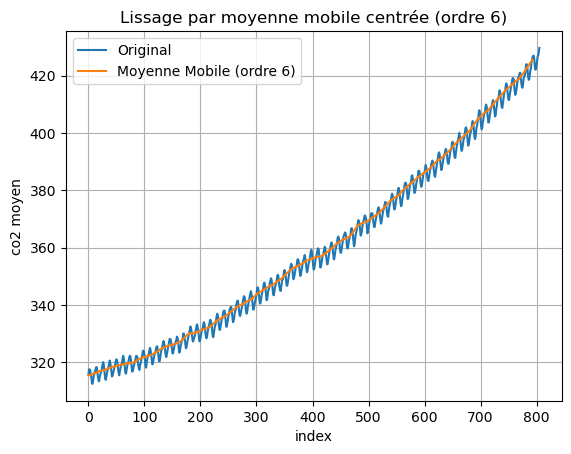

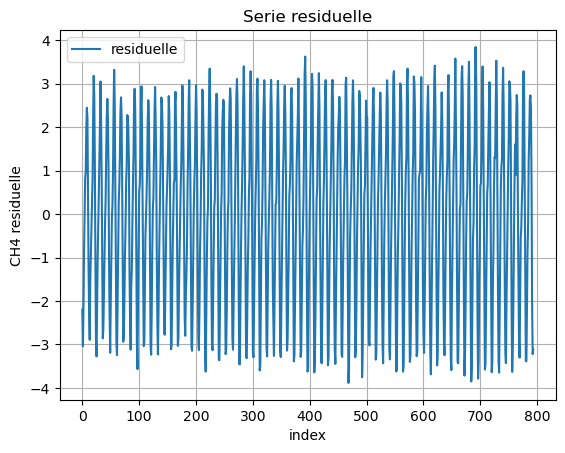

In [65]:
df_smoothed_co2 = moyenne_mobile_ordre_6(df_co2)
display(df_smoothed_co2)
affichage_moyenne_mobile_ordre_6(df_co2,df_smoothed_co2,"co2")
df_residual_co2 = serie_residuelle_vector(df_co2,df_smoothed_co2,6)
affichage_serie_residuelle(df_residual_co2,"CH4")

Il n'est pas possible de la faire sur les 6 premieres valeurs et les 6 dernières.

# Question 6